In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Problem #1

In [2]:
# read in data
df = pd.read_csv('creditcard.csv')

In [3]:
print(f'Shape: {df.shape}')
print(f'Columns: {df.columns}')

Shape: (284807, 31)
Columns: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
# check null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
# observe
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


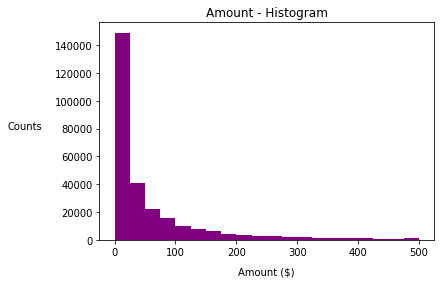

In [6]:
# observe 'Amount' histogram
plt.hist(df['Amount'], bins=20, range=(0,500), color='purple')
plt.title('Amount - Histogram')
plt.xlabel('Amount ($)', labelpad=10)
plt.ylabel('Counts', rotation='horizontal', labelpad=30)
plt.show()

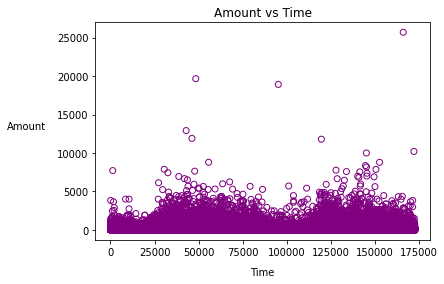

In [7]:
# observe 'Amount' vs 'Time'
plt.scatter(df['Time'].values, df['Amount'].values, color='purple', facecolors='none')
plt.title('Amount vs Time')
plt.xlabel('Time', labelpad=10)
plt.ylabel('Amount', rotation='horizontal', labelpad=30)
plt.show()

We see that a very few number of transactions occur above ~ $5000. Normally we might consider these extreme and remove them, but perhaps these outliers are highly correlated to fraudlent cases. Therefore, we will keep these points in the dataset.

Furthermore, considering that this data deals with transactions, people can buy the same things, leading to duplicate transactions. We can remove check and remove the duplicates.

# Problem #2

In [8]:
# check class balance
df['Class'].value_counts()
print(f'Normal: {284315/(284315+492)*100:.2f} %')
print(f'Fraudulent: {100 - (284315/(284315+492)*100):.2f} %')

Normal: 99.83 %
Fraudulent: 0.17 %


This dataset is unbalanced. Above we see that an overwhelming majority of cases in this dataset is 'Normal'.

Since we are dealing with binary class labels, we can utilize accuracy. Furthermore, this dataset seems apt for a classification model. Since this dataset deals with detecting fraudulent transactions, knowing False Positives and False Negatives is crucial. As a result, we can calculate precision and recall values over the entire dataset. To evaluate the model as a whole, we can utilize **F1 Score** = 2 * p * r / (p + r). The higher the F1 score, the better the performance of the model. F1 Score is more justified in this case as the dataset is highly unbalanced.

# Problem #3

In [9]:
from sklearn.preprocessing import StandardScaler

The Kaggle website states that the features are a result of PCA and have been standardized. As a result, we do not need to standardize these values. The *'Time'* feature is a derived feature and we thus can exclude it as it is just a monotonically increasing value based on the occurance of the transaction.

*'Amount'* values variable, and ranges widely as seen in the histogram. As such, we will need to standardize this feature as the few outlier values highly skew the dataset from the majority of low amount values.

In [10]:
# drop 'Time'
df.drop(['Time'], axis=1, inplace=True)

In [11]:
# standardize 'Amount'
scaler= StandardScaler()

df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(len(df), 1))

In [12]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [13]:
# sanity check
display(df.head())
print(f'\nShape: {df.shape}')

print(f'Removed {284807-275663} Duplicates')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0



Shape: (275663, 30)
Removed 9144 Duplicates


# Problem #4

In [14]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

In [15]:
# get features & label columns
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [16]:
# split data
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=7)

In [17]:
# sanity check
print('----- Shapes -----')
print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

----- Shapes -----
x_train: (137831, 29)
x_test: (137832, 29)
y_train: (137831,)
y_test: (137832,)


In [18]:
# function to run various models
def run_models(models, x_train, x_test, y_train, y_test):
    scores = {}
    
    # iterate through various models
    for m in models:
        # train
        model = m.fit(x_train, y_train)
        
        # predict
        y_pred = model.predict(x_test)
        
        # evaluate model performance (F1 Score)
        f1 = f1_score(y_test, y_pred)
        scores[m] = f1
        
    return scores

In [19]:
# runs models with regularization & grid search
def run_models2(model, parameters, x_train, x_test, y_train, y_test):
    clf = GridSearchCV(model, parameters, scoring='f1', n_jobs=-2)
    clf.fit(x_train, y_train)
    
    # score using model with best parameter
    score = clf.score(x_test, y_test)
    
    print(f'{model}\nBest Parameters: {clf.best_params_}')
    
    print(f'F1 Score: {score:.3f}\n')

## Without Regularization

In [62]:
# create models
models = [SVC(C=1e5), DecisionTreeClassifier(), MLPClassifier(alpha=0), RandomForestClassifier()]

In [63]:
# run models (NO REGULARIZATION)
scores = run_models(models, x_train, x_test, y_train, y_test)

In [64]:
# show results
print('F1 Scores\n')
for i in range(len(scores)):
    print(f'{models[i]}: {list(scores.values())[i]:.3f}\n')

F1 Scores

SVC(C=100000.0): 0.620

DecisionTreeClassifier(): 0.715

MLPClassifier(alpha=0): 0.853

RandomForestClassifier(): 0.856



## With Regularization

In [24]:
svc_params = {'C': [1,2,4,6,12]}
run_models2(SVC(), svc_params, x_train, x_test, y_train, y_test)

SVC()
Best Parameters: {'C': 6}
F1 Score: 0.796



In [25]:
tree_params = {'ccp_alpha': [1e3**-1, 1e4**-1, 1e5**-1, 1e6**-1]}
run_models2(DecisionTreeClassifier(), tree_params, x_train, x_test, y_train, y_test)

DecisionTreeClassifier()
Best Parameters: {'ccp_alpha': 1e-05}
F1 Score: 0.801



In [26]:
MLP_params = {'alpha': [1e2**-1, 1e3**-1, 1e4**-1, 1e5**-1]}
run_models2(MLPClassifier(), MLP_params, x_train, x_test, y_train, y_test)

MLPClassifier()
Best Parameters: {'alpha': 0.001}
F1 Score: 0.864



In [34]:
rf_params = {'ccp_alpha': [0, 1e3**-1, 1e5**-1, 1e7**-1, 1e9**-1]}
run_models2(RandomForestClassifier(), rf_params, x_train, x_test, y_train, y_test)

RandomForestClassifier()
Best Parameters: {'ccp_alpha': 0}
F1 Score: 0.857



Above, we see that with regularization and pruning, the performance of all models increased, except for the RandomForestClassifier which actually saw a slight decrease. This could be attributed difference in random state when selecting samples and features during training. Note that the reported F1 score is the result of all models in both cases predicting on the same out of sample x_test dataset. Nevertheless, we can see that regularization and pruning aids in the generalizability of the models on out of sample datasets.

# Problem #5

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [21]:
# convert data arrays to tensors
x_train_, y_train_ = torch.tensor(x_train.values), torch.tensor(y_train.values)
x_test_, y_test_ = torch.tensor(x_test.values), torch.tensor(y_test.values)

In [22]:
# create neural network
class MyNN(nn.Module):

    def __init__(self, n_hidden=30, epochs=100, eta=0.05, minibatch_size=50):
        super(MyNN, self).__init__()
        self.n_hidden = n_hidden
        self.epochs = epochs
        self.eta = eta
        self.minibatch_size = minibatch_size
        self.fc1, self.fc2, self.fc3 = None, None, None

        
    def _forward(self, X, apply_softmax=False):
        assert self.fc1 != None
        
        X = F.relu(self.fc1(X.float()))
        X = F.relu(self.fc2(X.float()))
        X = F.relu(self.fc3(X.float()))
        X = self.fc4(X)
        
        if apply_softmax:
            X = F.softmax(X, dim=1)
        return X

    
    def _reset(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                 m.reset_parameters()

                    
    def predict(self, X):
        assert self.fc1 != None
        
        net_out = self._forward(X, apply_softmax=True)
        p_values, indices = net_out.max(dim=1)
        return indices

    
    def fit(self, X_train, y_train):
        self._reset()  # Reset the neural network weights
        n_output= np.unique(y_train).shape[0]  # number of class labels
        n_features= X_train.shape[1]

        self.fc1 = nn.Linear(n_features, self.n_hidden)     # input layer
        self.fc2 = nn.Linear(self.n_hidden, self.n_hidden)  # hidden layer
        self.fc3 = nn.Linear(self.n_hidden, self.n_hidden)  # hidden
        self.fc4 = nn.Linear(self.n_hidden, n_output)       # output layer
        
        optimizer = optim.SGD(self.parameters(), lr=self.eta, momentum=0.9)
        loss_func = nn.CrossEntropyLoss()

        for i in range(self.epochs):
            indices = np.arange(X_train.shape[0])
            
            for start_idx in range(0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]
                optimizer.zero_grad()
                
                net_out = self._forward(X_train[batch_idx])
                
                loss = loss_func(net_out, y_train[batch_idx])
                loss.backward()
                optimizer.step()

In [173]:
%%time
# train 2 hidden layers neural network
Net1 = MyNN(n_hidden=30)

Net1.fit(x_train_, y_train_)

CPU times: user 12min 56s, sys: 2.48 s, total: 12min 59s
Wall time: 2min 10s


In [174]:
# predict
y_pred = Net2.predict(x_test_)

In [175]:
# get f1 score
print(f'F1 Score: {f1_score(y_pred, y_test_):.3f}')

F1 Score: 0.822


Using a 2 layer neural network, each with 30 neurons along with Stochastic Gradient Descent optimizer and Categorical Cross Entropy loss, we were able to get an F1 score of 0.822. This is comprable to the F2 score of the regularized MLP F1 score of 0.864.

# Problem #6

In [23]:
# create neural network
class MyNNDropout(nn.Module):

    def __init__(self, n_hidden=30, epochs=100, eta=0.05, minibatch_size=50, p_drop=0.2):
        super(MyNNDropout, self).__init__()
        self.n_hidden = n_hidden
        self.epochs = epochs
        self.eta = eta
        self.minibatch_size = minibatch_size
        self.p_drop = p_drop
        self.fc1, self.fc2, self.fc3, self.drop = None, None, None, None

        
    def _forward(self, X, apply_softmax=False):
        assert self.fc1 != None
        
        X = F.relu(self.fc1(X.float()))
        X = F.relu(self.fc2(X.float()))
        
        # dropout layer
        self.drop = nn.Dropout(p=self.p_drop)
        X = self.drop(X)
        
        X = F.relu(self.fc3(X.float()))
        
        # dropout layer
        self.drop = nn.Dropout(p=self.p_drop)
        X = self.drop(X)
        
        X = self.fc4(X)
        
        if apply_softmax:
            X = F.softmax(X, dim=1)
        return X

    
    def _reset(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                 m.reset_parameters()

                    
    def predict(self, X):
        assert self.fc1 != None
        
        net_out = self._forward(X, apply_softmax=True)
        p_values, indices = net_out.max(dim=1)
        return indices

    
    def fit(self, X_train, y_train):
        self._reset()  # Reset the neural network weights
        n_output= np.unique(y_train).shape[0]  # number of class labels
        n_features= X_train.shape[1]

        self.fc1 = nn.Linear(n_features, self.n_hidden)     # input layer
        self.fc2 = nn.Linear(self.n_hidden, self.n_hidden)  # hidden layer
        self.fc3 = nn.Linear(self.n_hidden, self.n_hidden)  # hidden layer
        self.fc4 = nn.Linear(self.n_hidden, n_output)       # output layer
        
        optimizer = optim.SGD(self.parameters(), lr=self.eta, momentum=0.9)
        loss_func = nn.CrossEntropyLoss()

        for i in range(self.epochs):
            indices = np.arange(X_train.shape[0])
            
            for start_idx in range(0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]
                optimizer.zero_grad()
                
                net_out = self._forward(X_train[batch_idx])
                
                loss = loss_func(net_out, y_train[batch_idx])
                loss.backward()
                optimizer.step()

In [211]:
%%time
# train 2 hidden layers neural network
NetDrop = MyNNDropout(n_hidden=30, p_drop=0.5)

NetDrop.fit(x_train_, y_train_)

CPU times: user 16min 45s, sys: 2.29 s, total: 16min 47s
Wall time: 2min 48s


In [212]:
# predict
y_pred = NetDrop.predict(x_test_)

In [213]:
# get f1 score
print(f'Dropout F1 Score: {f1_score(y_pred, y_test_):.3f}')

Dropout F1 Score: 0.806


# Problem #7

In [25]:
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold

In [28]:
# function to implement kfold CV for Random Forest
def eval_kfold(model, X, y):
    f1 = []
    
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
    
    for train_index, test_index in kf.split(X, y):
        model.fit(X[train_index], y[train_index])
        y_pred = model.predict(X[test_index])
        
        score = f1_score(y[test_index], y_pred)
        
        f1.append(score)
    
    return np.mean(f1)

In [77]:
# function to implement kfold CV for Neural Networks
def eval_kfoldNN(model, X, y):
    f1 = []
    
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
    
    indices = list(kf.split(X,y))
    
    for i in tqdm(range(10)):
        train_index, test_index = indices[i]
        
        # partition data
        x_train, y_train = X[train_index], y[train_index]
        x_test, y_test = X[test_index], y[test_index]
        
        # convert to tensors
        x_train, y_train = torch.tensor(x_train), torch.tensor(y_train)
        x_test, y_test = torch.tensor(x_test), torch.tensor(y_test)
        
        
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        
        score = f1_score(y_test, y_pred)
        
        f1.append(score)
    
    return np.mean(f1)

In [80]:
# Random Forest 10-Fold CV
RF_score = eval_kfold(RandomForestClassifier(n_jobs=-2), X.values, y.values)

print(f'Random Forest 10-Fold CV\nAverage F1 Score: {RF_score:.3f}')

Random Forest 10-Fold CV
Average F1 Score: 0.849


In [78]:
# Neural Network 2 Hidden Layers - No Dropout
Net1_score = eval_kfoldNN(MyNN(n_hidden=30), X.values, y.values)

print(f'Neural Network 10-Fold CV\nAverage F1 Score: {Net1_score:.3f}')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [36:41<00:00, 220.19s/it]

Neural Network 10-Fold CV
Average F1 Score: 0.791


In [79]:
# Neural Network 2 Hidden Layers - With Dropout
Net2_score = eval_kfoldNN(MyNNDropout(n_hidden=30, p_drop=0.5), X.values, y.values)

print(f'Neural Network w/ Dropout 10-Fold CV\nAverage F1 Score: {Net2_score:.3f}')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [50:54<00:00, 305.41s/it]

Neural Network w/ Dropout 10-Fold CV
Average F1 Score: 0.771


The Random Forest 10-fold CV had a slightly lower F1 score of 0.849 compared to the 50-50 dataset split Random Forest F1 score of 0.857. Since the 50-50 model was only able to predict on a single partition of the dataset, the result is not as informative on how it would perform on unknown data. Thus, the 10-fold CV Random Forest offers a better insight in the actual model's performance.

Both neural networks utilized 2 hidden layers. For the 10-fold CV, the Dropout model had a slightly lower score than the non-Dropout model. This is consistent with both networks performing on the 50-50 split dataset in part #6. The difference is about 0.02 between the F1 scores, so the difference is minimal. We should expect that dropout model to generalize better as this is a method of regularization. A possible explaination for this is that the dropout ratio p=0.5 is not optimal. We could perform a grid search to see whether we need to retain more or less weights in order for the Dropout model to generalize better than the non-dropout model. As I do not have CUDA available on my AMD GPU, the compute time is too long to test a grid search.